In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.optimizers import Adam
import os

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │       101,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218,192 (852.31 KB)

 Trainable params: 218,192 (852.31 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.7524 - loss: 0.3378 - val_accuracy: 0.8006 - val_loss: 0.1860
Epoch 2/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8016 - loss: 0.1774 - val_accuracy: 0.8045 - val_loss: 0.1579
Epoch 3/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.8054 - loss: 0.1541 - val_accuracy: 0.8065 - val_loss: 0.1460
Epoch 4/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.8073 - loss: 0.1432 - val_accuracy: 0.8086 - val_loss: 0.1383
Epoch 5/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8084 - loss: 0.1366 - val_accuracy: 0.8094 - val_loss: 0.1332
Epoch 6/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8096 - loss: 0.1313 - val_accuracy: 0.8092 - val_loss: 0.1305
Epoch 7/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.8097 - loss: 0.1286 - val_accuracy: 0.8098 - val_loss: 0.1283
Epoch 8/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8097 - loss: 0.1267 - 

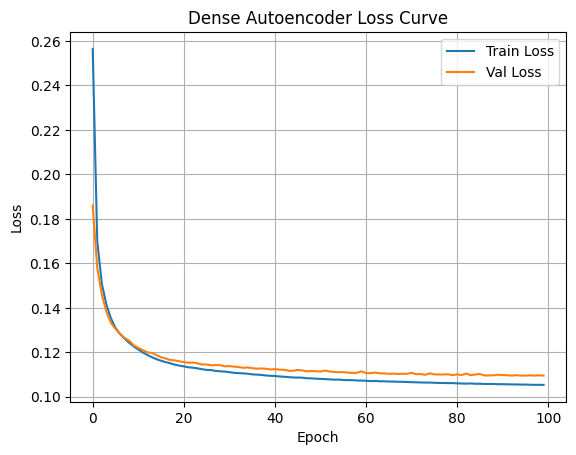

In [ ]:
# part a: Train an autoencoder to be able to produce noise-free images.
# Denoising Autoencoder (Dense)

# load data, ignore labels for unsupervised learning
(x_train, _), (x_test, _) = mnist.load_data()
# normalize pixel values to 0-1
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255
# reshape data by adding channel dimension, 1 for gray scale channel
# (num_samples, 28, 28) -> (num_samples, 28, 28, 1)
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# add noise
noise_factor = 0.5
x_train_noisy = np.clip(x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape), 0., 1.)

# define autoencoder: encoder - decoder
input_img = Input(shape=(28, 28, 1))
# encoder
x = Flatten()(input_img)
x = Dense(128, activation='relu')(x) # 1st layer w/ ReLU avtivation
x = Dense(64, activation='relu')(x) # 2nd layer: bottleneck -compressed representation
# decoder
x = Dense(128, activation='relu')(x)
x = Dense(28*28, activation='sigmoid')(x) # use sigmoid to normalize value in 0-1
output_img = Reshape((28, 28, 1))(x)

# create autoencoder model maps input to reconstruction
# Compile the model:
# - Adam optimizer - adaptive learning rate
# - Binary crossentropy loss - pixel values 0-1
# - Track accuracy metric
autoencoder_dense = Model(input_img, output_img)
autoencoder_dense.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
autoencoder_dense.summary()

# train model
history_dense = autoencoder_dense.fit(
    # noisy images as input, original clean data
    x_train_noisy, x_train,
    epochs=100,
    batch_size=256,
    shuffle=True,
    validation_split=0.1
)

# Save model
autoencoder_dense.save("dense_denoising_autoencoder.h5")

# Plot loss curve
plt.plot(history_dense.history['loss'], label='Train Loss')
plt.plot(history_dense.history['val_loss'], label='Val Loss')
plt.title("Dense Autoencoder Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


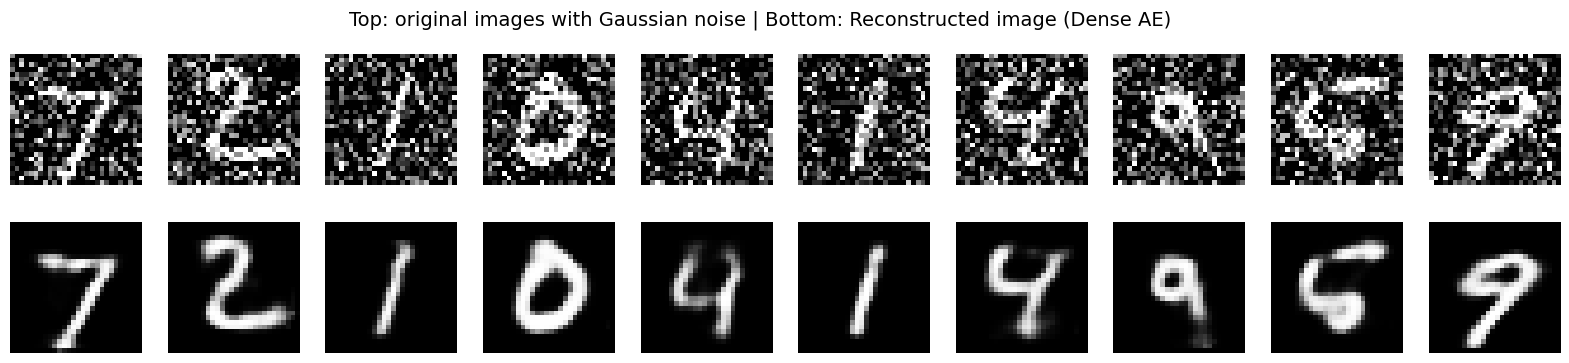

In [ ]:
# part b: Test on Noisy Test Images

# add Gaussian noise to the test image
x_test_noisy = np.clip(x_test + noise_factor * np.random.normal(0.0, 1.0, x_test.shape), 0., 1.)
# use the trained autoencoder to reconstruct the first 10 noisy images
decoded_imgs = autoencoder_dense.predict(x_test_noisy[:10])

plt.figure(figsize=(20, 4))
# display 2D table to show the images
# input images row
for i in range(10):
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.axis("off")
# output images
    ax = plt.subplot(2, 10, i + 11)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis("off")
plt.suptitle("Top: original images with Gaussian noise | Bottom: Reconstructed image (Dense AE)", fontsize=14)
plt.show()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 7, 7, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,193 (47.63 KB)

 Trainable params: 12,193 (47.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 103s 476ms/step - accuracy: 0.7965 - loss: 0.3608 - val_accuracy: 0.8047 - val_loss: 0.1392
Epoch 2/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 146s 495ms/step - accuracy: 0.8075 - loss: 0.1325 - val_accuracy: 0.8098 - val_loss: 0.1239
Epoch 3/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 139s 483ms/step - accuracy: 0.8096 - loss: 0.1214 - val_accuracy: 0.8108 - val_loss: 0.1188
Epoch 4/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 145s 500ms/step - accuracy: 0.8106 - loss: 0.1172 - val_accuracy: 0.8109 - val_loss: 0.1158
Epoch 5/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 128s 434ms/step - accuracy: 0.8108 - loss: 0.1146 - val_accuracy: 0.8112 - val_loss: 0.1138
Epoch 6/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 91s 430ms/step - accuracy: 0.8115 - loss: 0.1127 - val_accuracy: 0.8117 - val_loss: 0.1121
Epoch 7/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 144s 439ms/step - accuracy: 0.8116 - loss: 0.1111 - val_accuracy: 0.8115 - val_loss: 0.1109
Epoch 8/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 142s 440ms/step - accuracy: 0

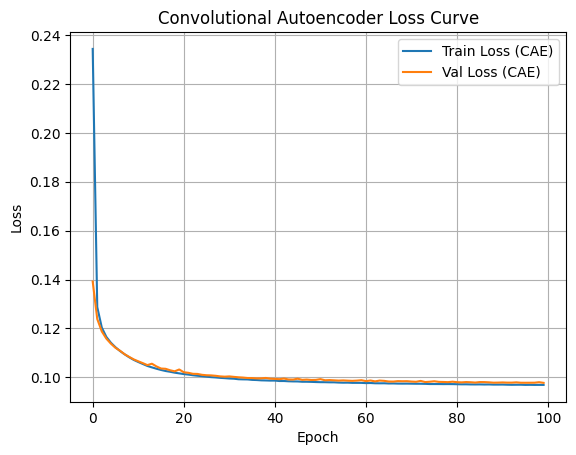

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


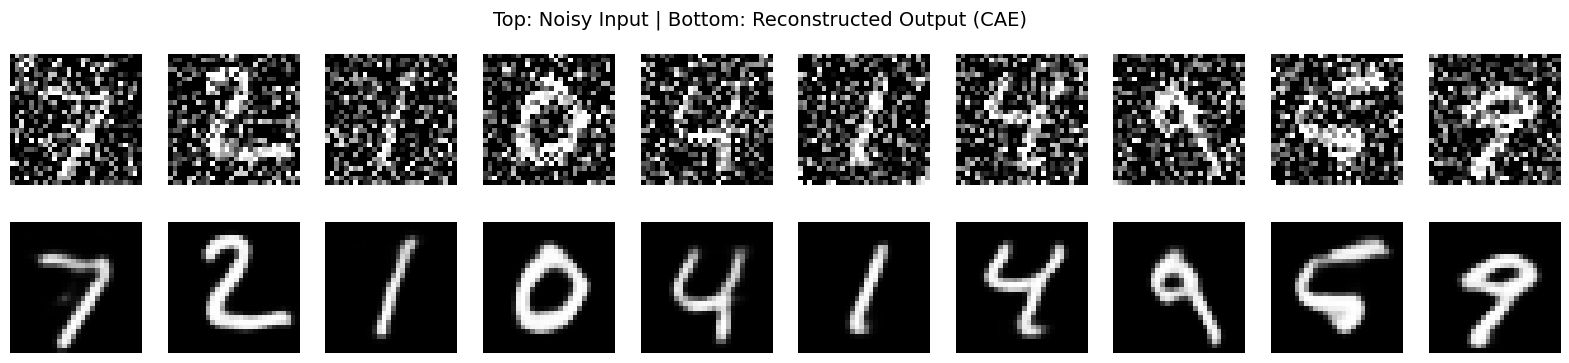

In [ ]:
# part c: Convolutional Autoencoder (CAE) implementation

from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

# add Gaussian noise to train images
x_train_noisy = np.clip(x_train + noise_factor * np.random.normal(0.0, 1.0, x_train.shape), 0., 1.)

input_img = Input(shape=(28, 28, 1))
# convolutional encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
# final encoded representation
encoded = MaxPooling2D((2, 2), padding='same')(x)

# decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# define model
autoencoder_conv = Model(input_img, decoded)
autoencoder_conv.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
autoencoder_conv.summary()

# train model
history_conv = autoencoder_conv.fit(
    x_train_noisy, x_train,
    epochs=100,
    batch_size=256,
    shuffle=True,
    validation_split=0.1
)
autoencoder_conv.save("conv_denoising_autoencoder.h5")

plt.plot(history_conv.history['loss'], label='Train Loss (CAE)')
plt.plot(history_conv.history['val_loss'], label='Val Loss (CAE)')
plt.title("Convolutional Autoencoder Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# test on noisy test images
x_test_noisy = np.clip(x_test + noise_factor * np.random.normal(0.0, 1.0, x_test.shape), 0., 1.)
# reconstruct first 10 noisy test images
decoded_imgs_conv = autoencoder_conv.predict(x_test_noisy[:10])

plt.figure(figsize=(20, 4))
for i in range(10):
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.axis("off")

    ax = plt.subplot(2, 10, i + 11)
    plt.imshow(decoded_imgs_conv[i].reshape(28, 28), cmap='gray')
    plt.axis("off")
plt.suptitle("Top: Noisy Input | Bottom: Reconstructed Output (CAE)", fontsize=14)
plt.show()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 32, 32, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 32, 32, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 32, 32, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 32, 32, 2)      │           290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,946 (238.07 KB)

 Trainable params: 60,946 (238.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 613s 2s/step - loss: 0.0109 - val_loss: 0.0105
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 624s 2s/step - loss: 0.0105 - val_loss: 0.0103
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 618s 2s/step - loss: 0.0101 - val_loss: 0.0099
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 618s 2s/step - loss: 0.0099 - val_loss: 0.0098
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 592s 2s/step - loss: 0.0097 - val_loss: 0.0097
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 616s 1s/step - loss: 0.0097 - val_loss: 0.0096
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 598s 2s/step - loss: 0.0098 - val_loss: 0.0096
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 621s 2s/step - loss: 0.0098 - val_loss: 0.0096
Epoch 9/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 595s 2s/step - loss: 0.0097 - val_loss: 0.0095
Epoch 10/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 622s 2s/step - loss: 0.0096 - val_loss: 0.0095
Epoch 11/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 618s 2s/step - loss: 0.0095 - val_loss: 0.0096
Epoch 12/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


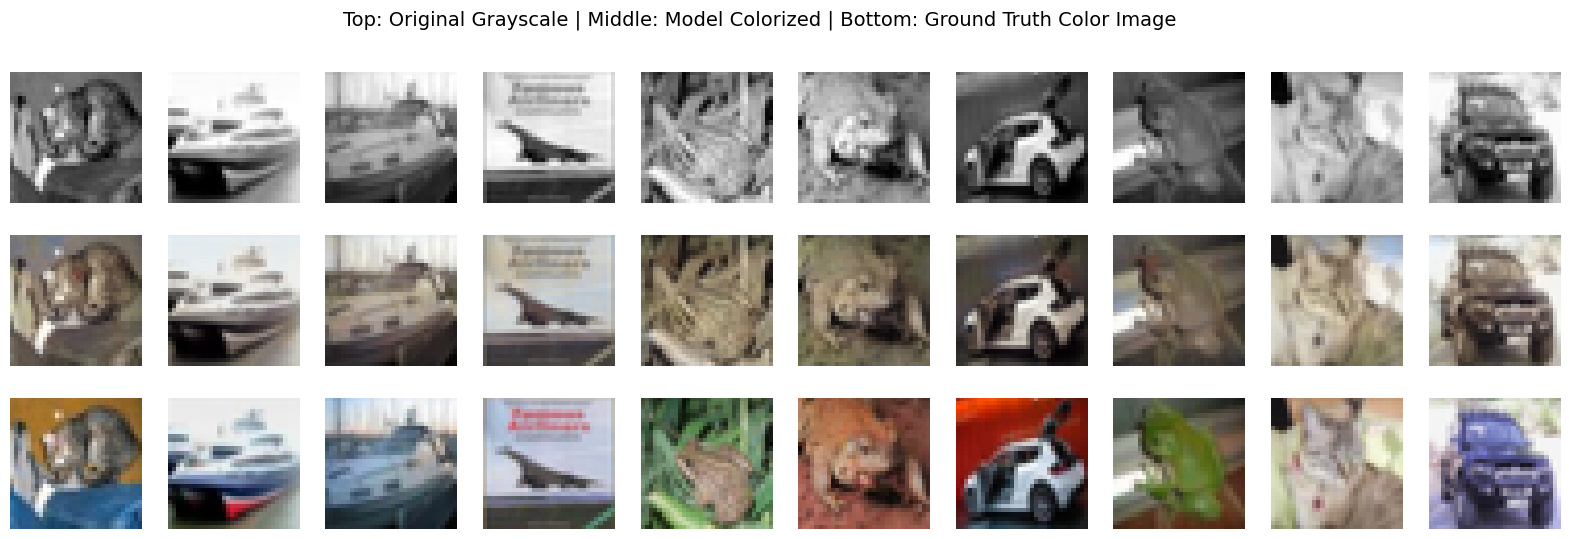

In [ ]:
# part d: Image Colorization task by using CIFAR-10
from tensorflow.keras.datasets import cifar10
from skimage.color import rgb2lab, lab2rgb
from skimage import img_as_float32

# load cifar-10 data
(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# convert RGB images to LAB color space in batches
def rgb_to_lab_batch(images):
    return np.array([rgb2lab(img) for img in images])
# LAB to RGB
def lab_to_rgb_batch(images):
    return np.array([lab2rgb(img) for img in images])

# convert training and test sets to LAB color space
x_train_lab = rgb_to_lab_batch(x_train)
x_test_lab = rgb_to_lab_batch(x_test)

# prepare L-lightness and AB-color channels
x_train_l = x_train_lab[:, :, :, 0:1] / 100.0
x_train_ab = x_train_lab[:, :, :, 1:] / 128.0

x_test_l = x_test_lab[:, :, :, 0:1] / 100.0
x_test_ab = x_test_lab[:, :, :, 1:] / 128.0

# Define the colorization model architecture
input_l = Input(shape=(32, 32, 1))
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_l)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
output_ab = Conv2D(2, (3, 3), activation='tanh', padding='same')(x)

# create, compile models
colorization_model = Model(input_l, output_ab)
colorization_model.compile(optimizer=Adam(), loss='mse')
colorization_model.summary()

# train models
colorization_model.fit(x_train_l, x_train_ab,
                       validation_data=(x_test_l, x_test_ab),
                       epochs=20, batch_size=128)

colorization_model.save("colorization_autoencoder.h5")

# Predict and visualize
pred_ab = colorization_model.predict(x_test_l[:10]) * 128.0
x_test_l_ = x_test_l[:10] * 100.0

output_images = []
for i in range(10):
    lab_image = np.zeros((32, 32, 3))
    lab_image[:, :, 0] = x_test_l_[i].reshape(32, 32)
    lab_image[:, :, 1:] = pred_ab[i]
    rgb_image = lab2rgb(lab_image)
    output_images.append(rgb_image)

plt.figure(figsize=(20, 6))
for i in range(10):
    ax = plt.subplot(3, 10, i + 1)
    plt.imshow(x_test_l[i].reshape(32, 32), cmap='gray')
    plt.axis("off")

    ax = plt.subplot(3, 10, i + 11)
    plt.imshow(output_images[i])
    plt.axis("off")

    ax = plt.subplot(3, 10, i + 21)
    plt.imshow(x_test[i])
    plt.axis("off")
plt.suptitle("Top: Original Grayscale | Middle: Model Colorized | Bottom: Ground Truth Color Image", fontsize=14)
plt.show()
